# **ESTRUTURA DO PROJETO**

**PASSO 1- Importar as bibliotecas necessárias**

In [29]:
import os
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
import numpy as np

**PASSO 2- Percorrer todos os arquivos(planilhas) existentes dentro de uma pasta**

In [30]:
lista_planilhas = os.listdir("Base_de_Dados")

**PASSO 3- Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**

In [31]:
total_vendas = pd.DataFrame()

for planilha in lista_planilhas:
    if 'Vendas' in planilha:
        tabela = pd.read_csv(f"Base_de_Dados/{planilha}")
        total_vendas = pd.concat([total_vendas, tabela])
display(total_vendas)



,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4- Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**

In [32]:
total_devolucao = pd.DataFrame()

for planilha in lista_planilhas:
    if 'Devolucoes' in planilha:
        tabela = pd.read_csv(f"Base_de_Dados/{planilha}")
        total_devolucao = pd.concat([total_devolucao,tabela])

display(total_devolucao)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICAORES**

**1.0- QUANTIDADE DE VENDAS LÍQUIDAS**

**Objetivos** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas

In [33]:
quantidade_produto_vl = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['SKU', 'Produto']).sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja_vl = total_vendas[['Loja', 'Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas líquidas por produto:</h2>'))
display(quantidade_produto_vl.head(3))

display(HTML('<hr>'))

display(HTML('<h2>Quantidade de vendas líquidas por loja:</h2>'))
display(quantidade_loja_vl.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [34]:
# GRÁFICO DE PIZZA OU TORTA
grafico1 = px.pie(quantidade_produto_vl.reset_index(), names='Produto', values='Quantidade',title='Venda líquida por produto') #reset.index(), pois ele tinha mais de 1 index
grafico1.update_traces(textposition='inside', textinfo='label+percent')
grafico1.show()

# GRÁFICO DE BARRA
grafico2 = px.bar(
    quantidade_loja_vl.reset_index(),
    x='Loja',
    y='Quantidade', 
    title='Quantidade de vendas líquidas por loja',
    color='Quantidade'
)
grafico2.show()

**1.1- QUANTIDADE DE VENDAS BRUTAS**

**Objetivos** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas

In [35]:
quantidade_produto_vb = pd.DataFrame(pd.concat([total_vendas,total_devolucao]).groupby(['SKU', 'Produto'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de venda bruta dos principais 3 produtos:</h2>'))
display(quantidade_produto_vb.head(3))

display(HTML('<hr>'))

quantidade_loja_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucao]).groupby(['Loja'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)
display(HTML('<h2>Quantidade de venda bruta das 3 principais lojas:</h2>'))
display(quantidade_loja_vb.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [36]:
# GRÁFICO DE BARRA
grafico3 = px.bar(
    quantidade_produto_vb.reset_index(),
    x='Produto',
    y='Quantidade',
    title='Quantidade de vendas brutas por produto',
    color='Produto'
)
grafico3.update_xaxes(categoryorder='total descending')
grafico3.update_layout(
    plot_bgcolor='#E2BFD9',
    paper_bgcolor = '#D1E9F6',
    font_color = '#000'
)
grafico3.show()

grafico4 = px.bar(
    quantidade_loja_vb.reset_index(),
    x='Loja',
    y='Quantidade',
    title='Quantidade de vendas brutas por loja',
    color='Loja'
)
grafico4.update_layout(
    xaxis={
        'tickfont': {
            'color': 'blue',
            'size': 14
        },
        'title':{
            'text': 'Eixo X',
            'font':{
                'color': 'red',
               'size':18 
            } 
        }
    },

    yaxis={
        'tickfont':{
            'color': 'yellowgreen',
            'size': 14
        },
        'title':{
            'text': 'Eixo Y',
            'font':{
                'color': 'purple',
                'size': 18
            }
        }
    }
)
grafico4.show()

**1.2- QUANTIDADE DE DEVOLUÇÕES**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções

In [37]:
quantidade_produto_dev = total_devolucao[['Produto', 'Quantidade']].groupby([ 'Produto']).sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Produtos que estão gerando mais devolução:</h2>'))
display(quantidade_produto_dev.head(3))

display(HTML('<hr>'))

quantidade_loja_dev = total_devolucao[['Loja','Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending=False)
display(HTML('<h2>Lojas que estão gerando mais devolução:</h2>'))
display(quantidade_loja_dev.head(3))

,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


Text(0.5, 1.0, 'Quantidade de Devoluções por Produto e por Loja')

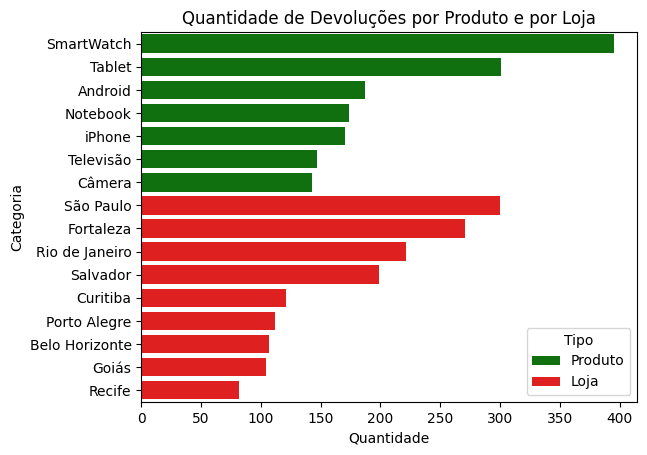

In [38]:
# criar DataFrame para gráficos com base nos DataFrames originais
quantidade_produto_dev_grafico = pd.DataFrame(
    {
        'Categoria':  quantidade_produto_dev.index,
        'Quantidade': quantidade_produto_dev['Quantidade'],
        'Tipo': ['Produto'] * len(quantidade_produto_dev)
    }
)

quantidade_loja_dev_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_loja_dev.index,
        'Quantidade': quantidade_loja_dev['Quantidade'],
        'Tipo': ['Loja'] * len(quantidade_loja_dev)
    }
)

# CONCATENAS OS DataFrames
df_concatenado = pd.concat([quantidade_produto_dev_grafico, quantidade_loja_dev_grafico])

# PLOTAR O GRÁFICO DE BARRAS HORIZONTAIS
cores = {'Produto':'green', 'Loja': 'red'}
grafico5 = sns.barplot(
    data= df_concatenado, # tabela(dataframe)
    x='Quantidade', #nome da coluna
    y='Categoria',
    hue='Tipo',
    orient='h', # horizontal
    palette=cores
)
grafico5.set_title('Quantidade de Devoluções por Produto e por Loja')

**2.0- ANÁLISE DE SAZONALIDADE**

**Objetivo:** Calcular a variação das vendas dos produtos por mês

In [39]:
data_formatada = pd.to_datetime(total_vendas['Data'], format='%m/%d/%Y')
vendas_mensais = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade']
    }
)

vendas_mensais = vendas_mensais.set_index('Data').resample('ME').sum()
vendas_mensais.index = vendas_mensais.index.strftime('%b/%Y')
vendas_mensais['Variacao'] = vendas_mensais['Quantidade'].diff()

display(HTML('<h2>Variação de vendas mensais:</h2>'))
display(vendas_mensais)

,Quantidade,Variacao
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [54]:
# GRÁFICO DE LINHA
text_color = np.where(vendas_mensais['Variacao'] < 0, 'red','blue')

grafico6 = px.line(
    vendas_mensais.reset_index(),
    x='Data',
    y='Quantidade',
    title='Vendas Mensais x Sazonalidade',
    markers=True,
    text=vendas_mensais['Quantidade']
)
grafico6.update_traces(
    textposition='top center', # marcador
    textfont = dict(color=text_color, size=14), # mudar a cor texto
    marker = dict(color=text_color) # mudar cor do marcador
) 

grafico6.show()

**2.1- ANÁLISE DE FATURAMENTO TRIMESTRAL**

**Objetivo:** Calcular o faturamento trimestral do ano

In [64]:
faturamento_trimestral = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade'],
        'Valor Unitário': total_vendas['Valor Unitário'],
        # NOVA COLUNA
        'Faturamento': total_vendas['Quantidade'] * total_vendas['Valor Unitário']
    }
)
# EXEMPLO DE VALORES POSSÍVEIS:
# 'D' para dias
# 'M' para meses
# 'Y' para anos
# 'Q' para trimestres
# 'W' para semanas
faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')
faturamento_trimestral = pd.DataFrame(faturamento_trimestral.groupby('Trimestre')['Faturamento'].sum())

display(HTML('<h2>Faturamento Trimestral:</h2>'))
display(faturamento_trimestral)

,Faturamento
Trimestre,
2023Q1,25038900
2023Q2,24163700
2023Q3,24970600
2023Q4,25146300


In [68]:
# GRÁFICO DE ÁREA
text_color = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red','blue')
faturamento_trimestral.index = faturamento_trimestral.index.astype(str)

grafico7 = px.area(
    faturamento_trimestral.reset_index(),
    x='Trimestre',
    y='Faturamento',
    title='faturamento Trimestral',
    markers=True
)

grafico7.update_layout(
    margin=dict(t=50, l=300, r=300, b=50),
    title=dict(x=0.5) # centralizado 50% eixo X
)

grafico7.update_traces(
    fillcolor = 'rgba(27, 239, 142, 0.2)',
    line_color = 'rgba(27,239,143,1)',
    marker=dict(color=text_color)
)

grafico7.show()